# Methdology

## Objective
- Identify which sensor can be eliminated to optimally reduce cost.

## Hypothesis
- Eliminating the no sensor (Nitric Oxide) in N. Mai, Los Angeles California (CA), will have a minimal impact on overall air quality monitoring. This
is based on the strong correlation, interdependence, or redundancy of `no` with other related pollutants, such as `no2` and `nox`. By leveraging
data from these sensors, it can effectively infer `no` levels, thereby optimally reducing project expenses while maintaining the integrity of air
quality data.

## Data

As for this part, I pulled installed the necessary libraries such as pyspark, findspark, and installed awscii or the AWS 3 for data pulling from my chosen location ID (`7936`) which is from `Los Angeles, CA`, specifically at `N. Mai`.

In [ ]:
# Installed the Spark libraries
!pip install pyspark
!pip install findspark

In [ ]:
# Installed the awscli or the AWS S3 for pulling the data from chosen location ID
!pip install awscli

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.21.2
    Uninstalling docutils-0.21.2:
      Successfully uninstalled docutils-0.21.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sphinx 8.1.3 requires docutils<0.22,>=0.20, but you have docutils 0.16 which is incompatible.


In [ ]:
# Imported the matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Imported the findspark
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder \
        .master('local[*]') \
        .appName('Methodology') \
        .getOrCreate()

print(spark.version)

3.5.3


In [ ]:
# Created a directory for the data
!mkdir raw_7936
!ls

raw_7936  sample_data


In [ ]:
# Extracted data from AWS S3 openaq-data-archive similar with previous coding exercises.
!aws s3 cp --recursive --no-sign-request s3://openaq-data-archive/records/csv.gz/locationid=7936/ raw_7936

download: s3://openaq-data-archive/records/csv.gz/locationid=7936/year=2017/month=06/location-7936-20170611.csv.gz to raw_7936/year=2017/month=06/location-7936-20170611.csv.gz
download: s3://openaq-data-archive/records/csv.gz/locationid=7936/year=2017/month=06/location-7936-20170617.csv.gz to raw_7936/year=2017/month=06/location-7936-20170617.csv.gz
download: s3://openaq-data-archive/records/csv.gz/locationid=7936/year=2017/month=06/location-7936-20170618.csv.gz to raw_7936/year=2017/month=06/location-7936-20170618.csv.gz
download: s3://openaq-data-archive/records/csv.gz/locationid=7936/year=2017/month=06/location-7936-20170610.csv.gz to raw_7936/year=2017/month=06/location-7936-20170610.csv.gz
download: s3://openaq-data-archive/records/csv.gz/locationid=7936/year=2017/month=06/location-7936-20170612.csv.gz to raw_7936/year=2017/month=06/location-7936-20170612.csv.gz
download: s3://openaq-data-archive/records/csv.gz/locationid=7936/year=2017/month=06/location-7936-20170609.csv.gz to ra

In [ ]:
# Defined the 7938 and displayed top 5 rows from the dataset
df_7936 = spark.read.csv('/content/raw_7936/*/*/', inferSchema=True, header=True)
df_7936.show(5)

+-----------+----------+--------------------+--------------------+---------+-------------------+---------+-----+-----+
|location_id|sensors_id|            location|            datetime|      lat|                lon|parameter|units|value|
+-----------+----------+--------------------+--------------------+---------+-------------------+---------+-----+-----+
|       7936|     25195|Los Angeles - N. ...|2024-10-25T01:00:...|34.066429|-118.22675500000001|     pm10|µg/m³| 30.0|
|       7936|     25195|Los Angeles - N. ...|2024-10-25T02:00:...|34.066429|-118.22675500000001|     pm10|µg/m³| 31.0|
|       7936|     25195|Los Angeles - N. ...|2024-10-25T03:00:...|34.066429|-118.22675500000001|     pm10|µg/m³| 22.0|
|       7936|     25195|Los Angeles - N. ...|2024-10-25T04:00:...|34.066429|-118.22675500000001|     pm10|µg/m³| 28.0|
|       7936|     25195|Los Angeles - N. ...|2024-10-25T05:00:...|34.066429|-118.22675500000001|     pm10|µg/m³| 27.0|
+-----------+----------+--------------------+---

In [ ]:
# Displayed the number of rows from the dataset
df_7936.count()

300270

### Summary statistics

In [ ]:
# As for this, I initiated with displaying the data types and schema from 7936
df_7936.printSchema()

root
 |-- location_id: string (nullable = true)
 |-- sensors_id: string (nullable = true)
 |-- location: string (nullable = true)
 |-- datetime: string (nullable = true)
 |-- lat: string (nullable = true)
 |-- lon: string (nullable = true)
 |-- parameter: string (nullable = true)
 |-- units: string (nullable = true)
 |-- value: string (nullable = true)



In [ ]:
# I displayed the summary of the data and its fields
df_7936.summary().show()

+-------+-----------+------------------+--------------------+--------------------+-----------------+--------------------+---------+------+------------------+
|summary|location_id|        sensors_id|            location|            datetime|              lat|                 lon|parameter| units|             value|
+-------+-----------+------------------+--------------------+--------------------+-----------------+--------------------+---------+------+------------------+
|  count|     300270|            300270|              300270|              300270|           300270|              300270|   300270|300270|            300270|
|   mean|     7936.0|415674.80313717655|                NULL|                NULL|34.06642899999882| -118.22675500000173|     NULL|  NULL|   6.8063333716322|
| stddev|        0.0|1227690.3275148014|                NULL|                NULL|              0.0|1.138215449651345...|     NULL|  NULL|13.241399649938087|
|    min|       7936|             23019|Los Angeles 

In [ ]:
# Displaying the summary of the values from the data
df_7936[['value']].summary().show()

+-------+------------------+
|summary|             value|
+-------+------------------+
|  count|            300270|
|   mean|   6.8063333716322|
| stddev|13.241399649938087|
|    min|           -0.0001|
|    25%|             0.006|
|    50%|             0.038|
|    75%|               9.5|
|    max|              99.0|
+-------+------------------+



In [ ]:
# I also created or replace the temp view of 7936
df_7936.createOrReplaceTempView('df_7936_view')

In [ ]:
# This will display the overview of data from 7936 limiting to 5 rows in tabular format
spark.sql("""
SELECT
  *
FROM
  df_7936_view
LIMIT
  5
""").show()

+-----------+----------+--------------------+--------------------+---------+-------------------+---------+-----+-----+
|location_id|sensors_id|            location|            datetime|      lat|                lon|parameter|units|value|
+-----------+----------+--------------------+--------------------+---------+-------------------+---------+-----+-----+
|       7936|     25195|Los Angeles - N. ...|2024-10-25T01:00:...|34.066429|-118.22675500000001|     pm10|µg/m³| 30.0|
|       7936|     25195|Los Angeles - N. ...|2024-10-25T02:00:...|34.066429|-118.22675500000001|     pm10|µg/m³| 31.0|
|       7936|     25195|Los Angeles - N. ...|2024-10-25T03:00:...|34.066429|-118.22675500000001|     pm10|µg/m³| 22.0|
|       7936|     25195|Los Angeles - N. ...|2024-10-25T04:00:...|34.066429|-118.22675500000001|     pm10|µg/m³| 28.0|
|       7936|     25195|Los Angeles - N. ...|2024-10-25T05:00:...|34.066429|-118.22675500000001|     pm10|µg/m³| 27.0|
+-----------+----------+--------------------+---

In [ ]:
# As for this, the procedure just identified the paramaters that are distinct from the data I pulled
spark.sql('''
WITH
distinct_parameter AS (
SELECT
  DISTINCT parameter
FROM
  df_7936_view
)
SELECT
  *
FROM
  distinct_parameter
''').show()

+---------+
|parameter|
+---------+
|      so2|
|       co|
|      nox|
|       o3|
|     pm10|
|      no2|
|       no|
|     pm25|
+---------+



In [ ]:
spark.sql("""
WITH
value_7936 AS (
SELECT
  value
FROM
  df_7936_view
)
,summary_stats_of_value_7936 AS (
SELECT
  COUNT(value) AS count
  ,COUNT(DISTINCT value) AS countd
  ,SUM(value) AS sum
  ,AVG(value) AS avg
  ,MIN(value) AS min
  ,PERCENTILE_APPROX(value, 0.25) AS p25
  ,PERCENTILE_APPROX(value, 0.50) AS p50
  ,PERCENTILE_APPROX(value, 0.75) AS p75
  ,MAX(value) AS MAX
  ,COUNT(CASE WHEN value IS NULL THEN 1 ELSE NULL END) AS count_null
  ,COUNT(CASE WHEN value = 0 THEN 1 ELSE NULL END) AS count_zero
FROM
  value_7936
)

SELECT
  *
FROM
  summary_stats_of_value_7936
""").show()

+------+------+------------------+-----------------+-------+-----+-----+---+----+----------+----------+
| count|countd|               sum|              avg|    min|  p25|  p50|p75| MAX|count_null|count_zero|
+------+------+------------------+-----------------+-------+-----+-----+---+----+----------+----------+
|300270|  1892|2043737.7215000005|6.806333371632199|-0.0001|0.006|0.038|9.5|99.0|         0|    206439|
+------+------+------------------+-----------------+-------+-----+-----+---+----+----------+----------+



In [ ]:
from pyspark.sql.functions import col, when, count, avg, stddev, min, max, expr, percentile_approx

# Convert 'value' column to double if not already done
df_7936 = df_7936.withColumn("value", col("value").cast("double"))

# Grouped Summary Statistics by 'parameter'
summary_stats = df_7936.groupBy("parameter").agg(
    count("value").alias("count"),
    avg("value").alias("avg"),
    stddev("value").alias("stddev"),
    min("value").alias("min"),
    percentile_approx("value", 0.25).alias("p25"),
    percentile_approx("value", 0.5).alias("median"),
    percentile_approx("value", 0.75).alias("p75"),
    max("value").alias("max"),
    count(when(col("value").isNull(), 1)).alias("count_null"),
    count(when(col("value") == 0, 1)).alias("count_zero")
)

# Displaying the computed summary statistics
summary_stats.show(truncate=False)

+---------+-----+--------------------+---------------------+-------+------+--------------------+--------------------+-------------------+----------+----------+
|parameter|count|avg                 |stddev               |min    |p25   |median              |p75                 |max                |count_null|count_zero|
+---------+-----+--------------------+---------------------+-------+------+--------------------+--------------------+-------------------+----------+----------+
|so2      |45978|2.166253425551352E-4|4.0469469107801414E-4|-0.001 |0.0   |0.0                 |2.0E-4              |0.01               |0         |28567     |
|co       |41345|0.3922338855968071  |0.2521266972705292   |0.0    |0.2   |0.3                 |0.5                 |2.0                |0         |2         |
|nox      |13812|0.021882956849116716|0.02035537932657966  |8.0E-4 |0.0079|0.014199999999999999|0.028399999999999998|0.16219999999999998|0         |0         |
|o3       |46442|0.025039447052237186|0.

### Histogram

In [ ]:
from pyspark.sql.functions import floor

# Defining the bin size for the histogram
bin_size = 10

In [ ]:
# This will create histogram bins by dividing the value column by bin_size and flooring the result
df_binned = df_7936.withColumn("value_bin", floor(col("value") / bin_size) * bin_size)

In [ ]:
# This is group by parameter and value_bin to count occurrences in each bin
histogram = df_binned.groupBy("parameter", "value_bin").count().orderBy("parameter", "value_bin")

In [ ]:
# Show histogram data
histogram.show(truncate=False)

+---------+---------+-----+
|parameter|value_bin|count|
+---------+---------+-----+
|co       |0        |41345|
|no       |-10      |1582 |
|no       |0        |12234|
|no2      |0        |46497|
|nox      |0        |13812|
|o3       |0        |46442|
|pm10     |-10      |8    |
|pm10     |0        |2320 |
|pm10     |10       |9300 |
|pm10     |20       |14195|
|pm10     |30       |10715|
|pm10     |40       |5658 |
|pm10     |50       |2526 |
|pm10     |60       |979  |
|pm10     |70       |387  |
|pm10     |80       |172  |
|pm10     |90       |80   |
|pm10     |100      |49   |
|pm10     |110      |26   |
|pm10     |120      |14   |
+---------+---------+-----+
only showing top 20 rows



In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Collecting histogram data for plotting
histogram_data = histogram.collect()

In [ ]:
# Preparing data for visualization
histogram_dict = {}
for row in histogram_data:
    param = row['parameter']
    bin_value = row['value_bin']
    count = row['count']
    if param not in histogram_dict:
        histogram_dict[param] = {'bins': [], 'counts': []}
    histogram_dict[param]['bins'].append(bin_value)
    histogram_dict[param]['counts'].append(count)

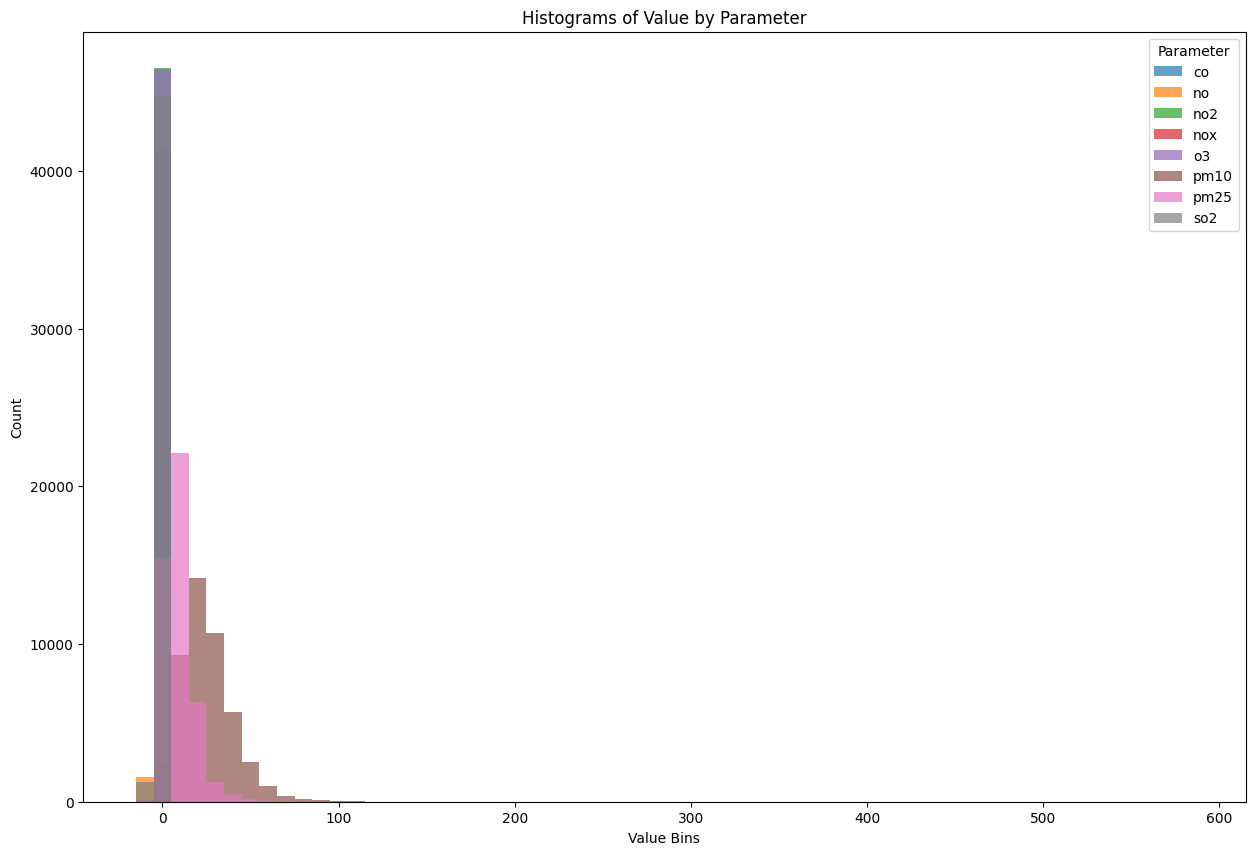

In [ ]:
# Plotting histograms for each parameter
plt.figure(figsize=(15, 10))

for param, data in histogram_dict.items():
    plt.bar(data['bins'], data['counts'], width=bin_size, alpha=0.7, label=param)

# I added labels, legend, and title for a more customized presentation
plt.xlabel("Value Bins")
plt.ylabel("Count")
plt.title("Histograms of Value by Parameter")
plt.legend(title="Parameter", loc='upper right')
plt.show()

In this procedure, I created the histogram to visualize the frequency distribution of values for different parameters. First, values in the `value` column are grouped into bins of size 10 using the `floor` function to create a `value_bin` column.

Furthermore, I grouped the data by `parameter` and `value_bin`, and the count of occurrences in each bin is computed. These grouped counts are collected into a dictionary, organizing the bin edges and counts for each parameter. Finally, a bar chart is plotted for each parameter, using bins as the x-axis and counts as the y-axis. Lastly, labels, a title, and a legend are added for clarity, and the plot is displayed, enabling easy comparison of the distributions across parameters.

### Boxplot

In [ ]:
from pyspark.sql.functions import col, expr, lit, collect_list, array_sort, size, element_at
import matplotlib.pyplot as plt

# Computing summary statistics for each parameter
# As required, I used PySpark to compute the five-number summary (min, Q1, median, Q3, max)
summary_df = (
    df_7936.groupBy("parameter")
    .agg(
        expr("min(value)").alias("min"),
        expr("percentile_approx(value, 0.25)").alias("q1"),
        expr("percentile_approx(value, 0.5)").alias("median"),
        expr("percentile_approx(value, 0.75)").alias("q3"),
        expr("max(value)").alias("max")
    )
)

In [ ]:
# Collecting the summary statistics to the driver
summary_data = summary_df.collect()

In [ ]:
# Preparing the data for boxplot
boxplot_data = {}
for row in summary_data:
    param = row["parameter"]
    boxplot_data[param] = {
        "min": row["min"],
        "q1": row["q1"],
        "median": row["median"],
        "q3": row["q3"],
        "max": row["max"],
    }

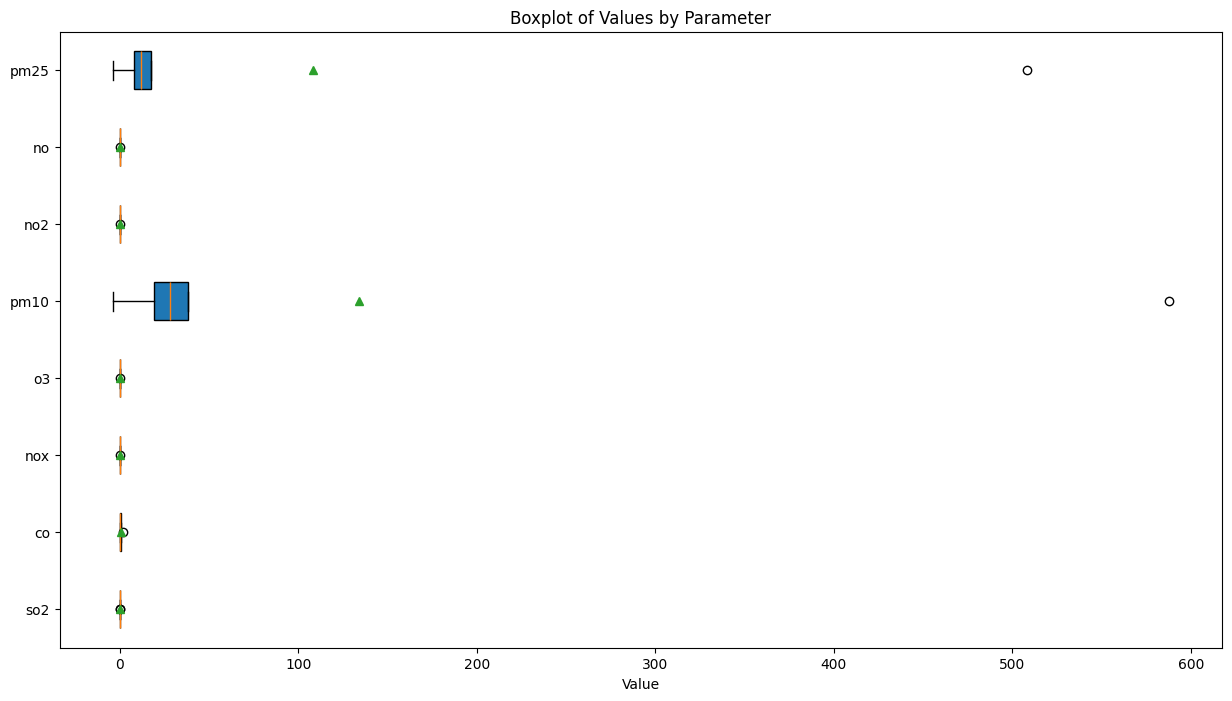

In [ ]:
# Creating a boxplot using matplotlib
fig, ax = plt.subplots(figsize=(15, 8))

# Preparing data for plotting
parameters = list(boxplot_data.keys())
boxplot_stats = [
    [
        boxplot_data[param]["min"],
        boxplot_data[param]["q1"],
        boxplot_data[param]["median"],
        boxplot_data[param]["q3"],
        boxplot_data[param]["max"],
    ]
    for param in parameters
]

# Creation of boxplots
ax.boxplot(
    boxplot_stats,
    vert=False,  # Horizontal boxplots
    patch_artist=True,  # Fill boxes with color
    showmeans=True,  # Show the mean as a point
    meanline=False
)

# As for this, I customized the boxplot with legends in their parameters
ax.set_yticks(range(1, len(parameters) + 1))
ax.set_yticklabels(parameters)
ax.set_xlabel("Value")
ax.set_title("Boxplot of Values by Parameter")
plt.show()

After creating the boxplot, I have observed that the boxplot alone does not directly confirm the hypothesis of redundancy between `no`, `no2`, and `nox`. However, it just provides context about the variability and measurement range of `no` compared to other sensors, which might suggest similarity.

With that being said, to test my hypothesis properly, I need **correlation analysis** or predictive modeling to demonstrate that `no`can be inferred from `no2` and `nox`.

In [39]:
from pyspark.sql.functions import corr

In [41]:
# Filtering the DataFrame for relevant sensors
sensors_to_analyze = ['no', 'no2', 'nox']
sensor_dfs = {sensor: df_7936.filter(col("parameter") == sensor).select("datetime", "value") for sensor in sensors_to_analyze}

# Joining the filtered DataFrames on datetime to align sensor values
joined_df = sensor_dfs['no'].alias("no").join(
    sensor_dfs['no2'].alias("no2"), on="datetime", how="inner"
).join(
    sensor_dfs['nox'].alias("nox"), on="datetime", how="inner"
)

# Renaming columns for clarity
joined_df = joined_df.select(
    col("no.value").alias("no_value"),
    col("no2.value").alias("no2_value"),
    col("nox.value").alias("nox_value"),
)

# Computing correlations
correlations = {}
for sensor1 in ['no_value', 'no2_value', 'nox_value']:
    for sensor2 in ['no_value', 'no2_value', 'nox_value']:
        if sensor1 != sensor2:
            corr_value = joined_df.stat.corr(sensor1, sensor2)
            correlations[(sensor1, sensor2)] = corr_value

# Displaying correlations
for pair, value in correlations.items():
    print(f"Correlation between {pair[0]} and {pair[1]}: {value}")

Correlation between no_value and no2_value: 0.651010621546902
Correlation between no_value and nox_value: 0.9248677223123383
Correlation between no2_value and no_value: 0.651010621546902
Correlation between no2_value and nox_value: 0.8907238317104037
Correlation between nox_value and no_value: 0.9248677223123383
Correlation between nox_value and no2_value: 0.8907238317104037


### Scatterplot

In [60]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

In [61]:
# Extracting data from PySpark DataFrame for each pair
no_no2 = joined_df.select(col("no_value").alias("x"), col("no2_value").alias("y")).collect()
no_nox = joined_df.select(col("no_value").alias("x"), col("nox_value").alias("y")).collect()
no2_nox = joined_df.select(col("no2_value").alias("x"), col("nox_value").alias("y")).collect()

In [62]:
# Converting the collected rows into lists of values
def extract_xy(pairs):
    x_values = [row['x'] for row in pairs]
    y_values = [row['y'] for row in pairs]
    return x_values, y_values

no_no2_x, no_no2_y = extract_xy(no_no2)
no_nox_x, no_nox_y = extract_xy(no_nox)
no2_nox_x, no2_nox_y = extract_xy(no2_nox)

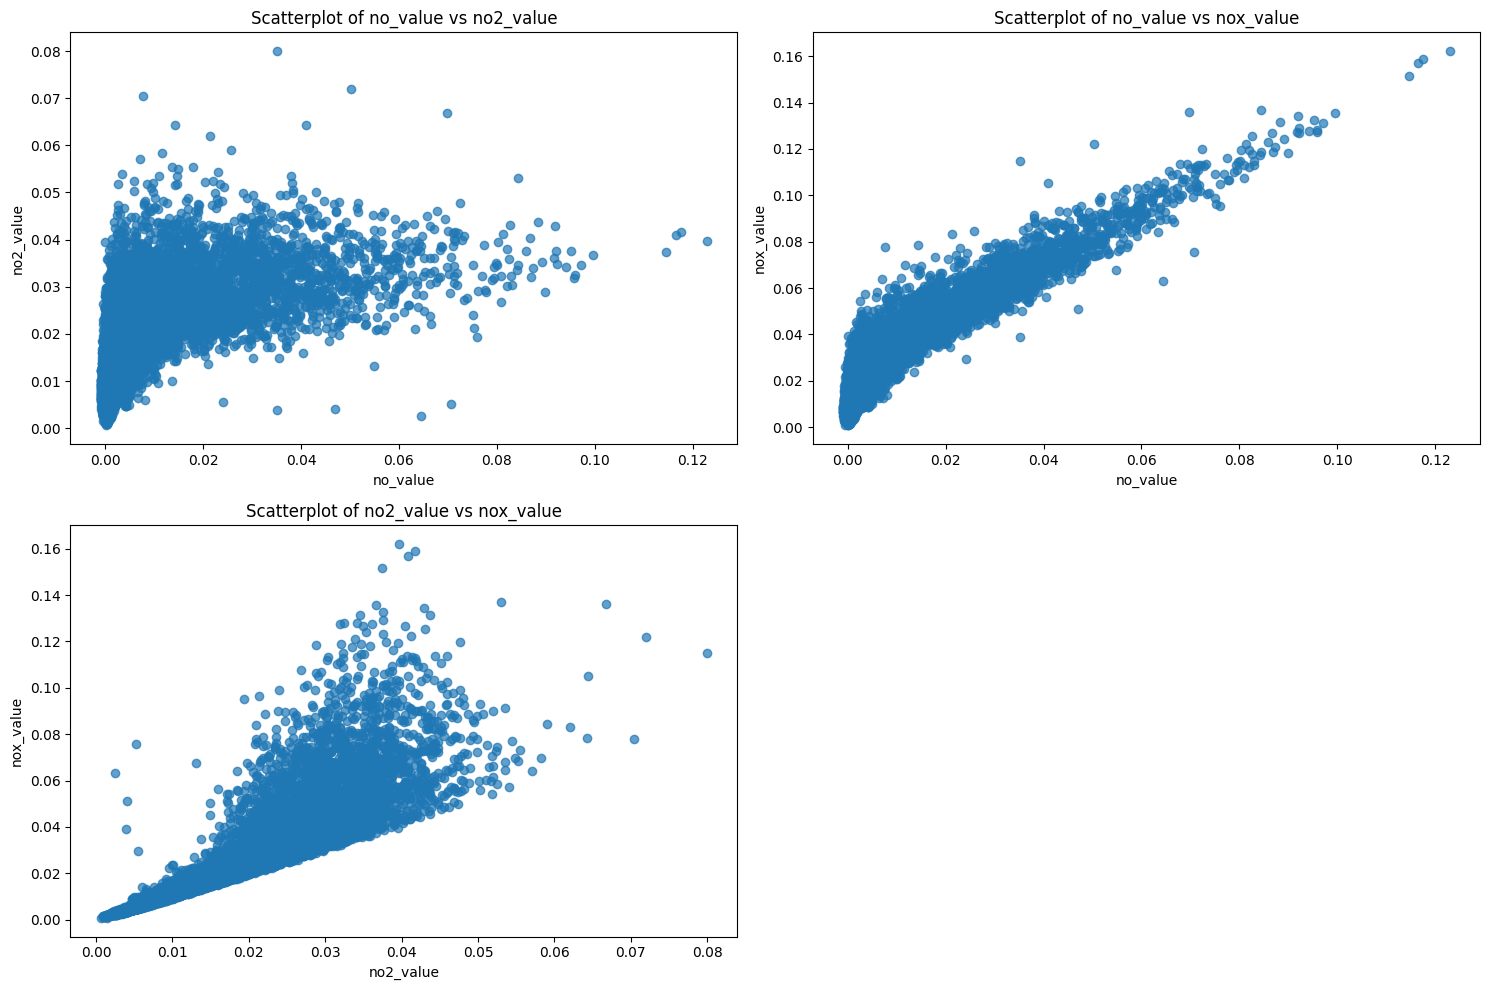

In [70]:
# Plotting the scatterplots
plt.figure(figsize=(15, 10))

# no vs no2
plt.subplot(2, 2, 1)
plt.scatter(no_no2_x, no_no2_y, alpha=0.7)
plt.title("Scatterplot of no_value vs no2_value")
plt.xlabel("no_value")
plt.ylabel("no2_value")

# no vs nox
plt.subplot(2, 2, 2)
plt.scatter(no_nox_x, no_nox_y, alpha=0.7)
plt.title("Scatterplot of no_value vs nox_value")
plt.xlabel("no_value")
plt.ylabel("nox_value")

# no2 vs nox
plt.subplot(2, 2, 3)
plt.scatter(no2_nox_x, no2_nox_y, alpha=0.7)
plt.title("Scatterplot of no2_value vs nox_value")
plt.xlabel("no2_value")
plt.ylabel("nox_value")

# Adjusting layout and display the plots
plt.tight_layout()
plt.show()

## Analysis

Based on the procedures in this methdology, the air quality data from Los Angeles (`CA, N. Mai`) reveals important patterns in pollution levels and how it can improve monitoring. Most pollutants, like carbon monoxide (`co`), ozone (`o3`), and nitrogen dioxide (`no2`), have low levels (`0–10 units`). However, particulate matter (`pm10`) varies a lot, with some high spikes caused by events like dust storms or heavy traffic. Negative values in some measurements, like NO and PM10, seem to be errors and need fixing. Many pollutants show occasional high spikes, which affect averages.

Nitrogen oxides (`no`, `no2`, `nox`) are closely related, especially `no` and `nox`, which have a strong connection (`0.925`). This means we can estimate `no` levels using `nox` and `no2` data, which might reduce the need for extra sensors. Particulate matter (`pm10` and `pm25`), on the other hand, needs separate monitoring because of its unpredictable changes and impact on health.

Graphs showed `pm10` has more outliers (unusual values), while gases like `no2` and `o3` tend to stay within stable ranges. I think that, scatterplots confirmed strong links between nitrogen oxides, but a few odd points need more investigation.

To improve air quality monitoring, I recommend using `nox` and `no2` sensors to estimate `no`, fixing errors in the data, and keeping a close watch on `pm10` and `pm25`, especially during pollution events. With that being said, by focusing on what matters most and fixing issues in the data, this procedure can make monitoring more reliable and cost-effective while protecting public health.


## Conclusion

Therefore, I conlude that, this analysis confirms that the **hypothesis holds true: eliminating the NO (Nitric Oxide) sensor in Los Angeles, California, will not significantly impact the overall air quality monitoring process**. The data shows a **strong correlation** between `no` and the other nitrogen oxides (`no2` and `nox)`, particularly between `no` and `nox` (0.925), meaning NO levels can reliably be inferred from `nox` and `no2` measurements. Therefore, removing the `no` **sensor would reduce costs without sacrificing data accuracy**, as these sensors can effectively provide the necessary information on `no` levels.

Also, I think that the objective of identifying a sensor to eliminate for cost optimization is **successfully met by this analysis**. By relying on the existing NO2 and NOX sensors, we can cut down on sensor costs while still ensuring reliable monitoring of nitrogen oxide levels in the area. Additionally, the need for separate monitoring of particulate matter (`pm10` and `pm25`) remains, as their variability and health impact justify the continued use of dedicated sensors for these pollutants.

In summary, eliminating the `no` sensor is a viable cost-reduction strategy that aligns with the hypothesis and objectives, and it will not compromise the integrity of air quality data.